In [1]:
# importación de las librerias y bibliotecas que serán utilizadas para el análisis y preparación de los datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Lectura del dataset 
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
#Visualización inicial del conjunto de datos
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


# Evaluación de los datos

Vamos analizar la información del dataset para poder conocer un poco los datos con los que estaremos trabajando, asi como para poder determinar que procesos necesitamos implementar.

In [4]:
#Visualizamos la informacion básica del conjunto de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    object 
 2   Age              400 non-null    float64
 3   EstimatedSalary  400 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB


In [5]:
#Visualización de la información estadística del conjunto de datos
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [6]:
# Validación de la correlación entre las variables de entrada con relación a la variable de salida.
corr_matrix = df.corr()
corr_matrix["Purchased"].sort_values(ascending=False)

Purchased          1.000000
Age                0.622454
EstimatedSalary    0.362083
User ID            0.007120
Name: Purchased, dtype: float64

In [7]:
#Validación si hay algún valor nulo en el conjunto de datos.
df.isna().any()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

In [8]:
#Validación de la cantidad de ejemplos que posee el dataset segun la variable de salida.
df["Purchased"].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [9]:
#Transformación de las columnas categoricas a numericas.
df_new = pd.get_dummies(df, columns=['Gender'], drop_first=True)

In [10]:
#Eliminación de datos que son irrelevantes y que podrian afectar los resultado.
df_new = df_new.drop(["User ID"], axis=1)

In [11]:
#Vizualición de los cambios aplicados
df_new

,Age,EstimatedSalary,Purchased,Gender_Male
0,19.0,19000.0,0,1
1,35.0,20000.0,0,1
2,26.0,43000.0,0,0
3,27.0,57000.0,0,0
4,19.0,76000.0,0,1
...,...,...,...,...
395,46.0,41000.0,1,0
396,51.0,23000.0,1,1
397,50.0,20000.0,1,0
398,36.0,33000.0,0,1


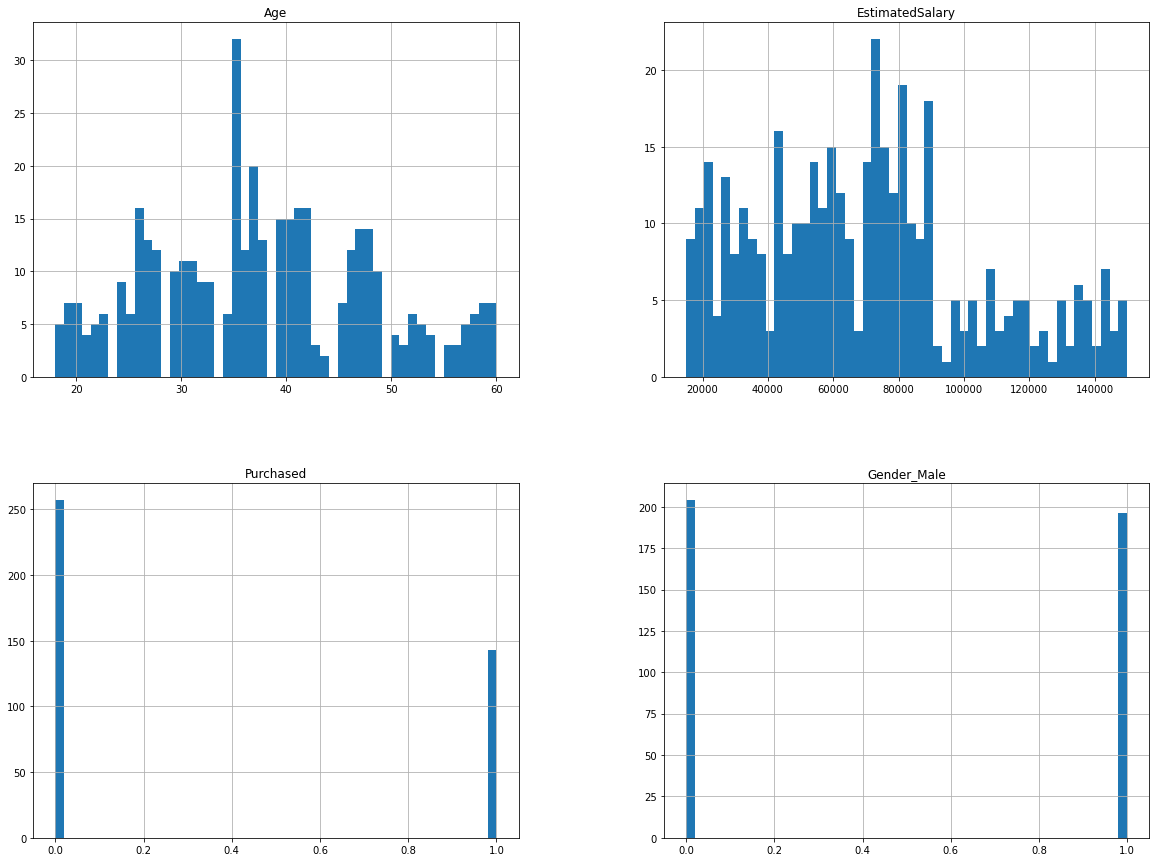

In [12]:
# Representación gráfica de la distribución de los atributos
df_new.hist(bins=50, figsize=(20,15))
plt.show()

In [13]:
sueldo_grupo = pd.cut(x=df_new['EstimatedSalary'], 
                      bins=[15000,35000,55000,75000,95000,105000,125000,145000,150000,float('inf')], 
                      labels=["15000-35000","35000-55000","55000-75000","75000-95000","95000-105000","105000-125000","125000-145000","145000-150000","150000+"])
sueldo_total = sueldo_grupo.value_counts().sort_index()

sueldo_indexes = sueldo_total.index.values
sueldo_valores = sueldo_total.values

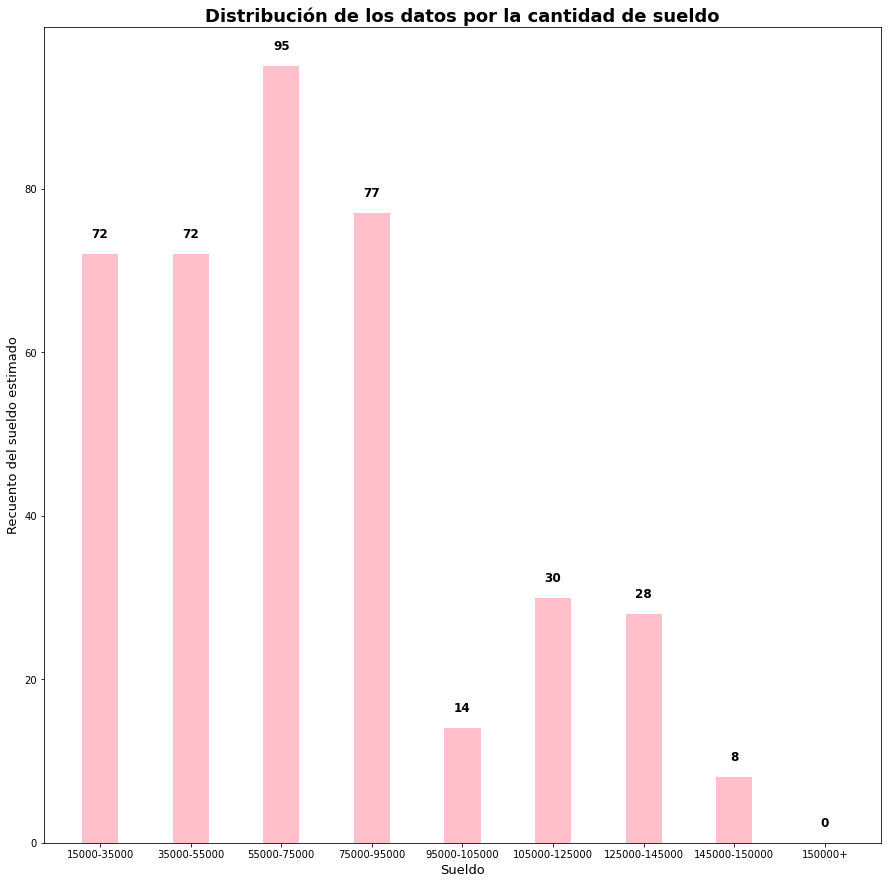

In [14]:
plt.figure(figsize = (15, 15))
 
# Creacion de una gráfica bar plot para representar la distribución del sueldo
sueldo_bar = plt.bar(sueldo_indexes, sueldo_valores, color ='pink', width = 0.4)
for i, rectangle in enumerate(sueldo_bar):
    height = rectangle.get_height()
    plt.text(rectangle.get_x() + rectangle.get_width()/2, height+2,
             sueldo_valores[i], horizontalalignment='center', weight='bold', fontsize=12)
 
plt.xlabel("Sueldo", fontsize=13)
plt.ylabel("Recuento del sueldo estimado", fontsize=13)
plt.title("Distribución de los datos por la cantidad de sueldo", weight='bold', fontsize=18)
plt.show()

In [15]:
edad_grupo = pd.cut(x=df_new['Age'], bins=[0,8,18,30,40,60,float('inf')], labels=["0-8","8-18","18-30","30-40","40-60","60+"])
edad_total = edad_grupo.value_counts().sort_index()

edad_indexes = edad_total.index.values
edad_valores = edad_total.values

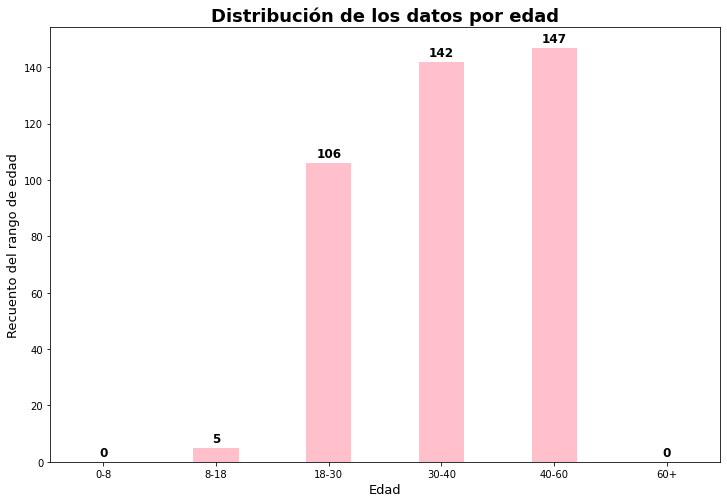

In [16]:
plt.figure(figsize = (12, 8))
 
# Creación de una gráfica bar plot para representar la distribución de la edad
edad_bar = plt.bar(edad_indexes, edad_valores, color ='pink', width = 0.4)
for i, rectangle in enumerate(edad_bar):
    height = rectangle.get_height()
    plt.text(rectangle.get_x() + rectangle.get_width()/2, height+2,
             edad_valores[i], horizontalalignment='center', weight='bold', fontsize=12)
 
plt.xlabel("Edad", fontsize=13)
plt.ylabel("Recuento del rango de edad", fontsize=13)
plt.title("Distribución de los datos por edad", weight='bold', fontsize=18)
plt.show()

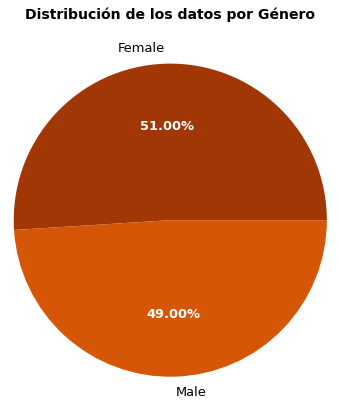

In [17]:
#Creación de una gráfica para representar el porcentaje por género
Gender = df['Gender'].value_counts()

fig, ax = plt.subplots(figsize =(8, 6))
_, _, autotexts = ax.pie(x=Gender, labels=Gender.index, autopct="%.2f%%", radius=1.2,
                         colors=sns.color_palette("YlOrBr_r"), explode=None, textprops=dict(fontsize=13))

ax.set_title('Distribución de los datos por Género', y=1.1, weight='bold', fontsize=14)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')

Text(0.5, 1.0, 'Gráfica de la cantidad por género que hicieron si o no clic en el anuncio')

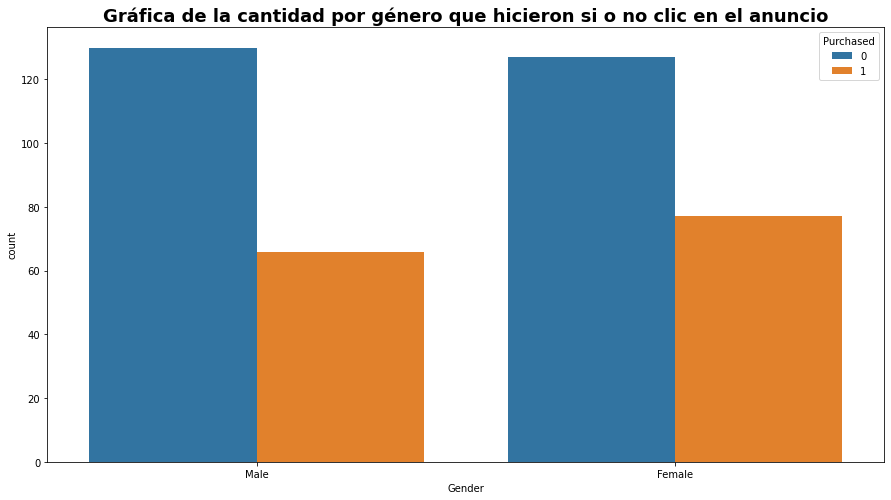

In [18]:
# Creación de una gráfica por género de las personas que hicieron si o no click al anuncio
plt.figure(figsize=[15,8])
sns.countplot(x = 'Gender', hue = 'Purchased', data = df)
plt.title('Gráfica de la cantidad por género que hicieron si o no clic en el anuncio', weight='bold', fontsize=18)

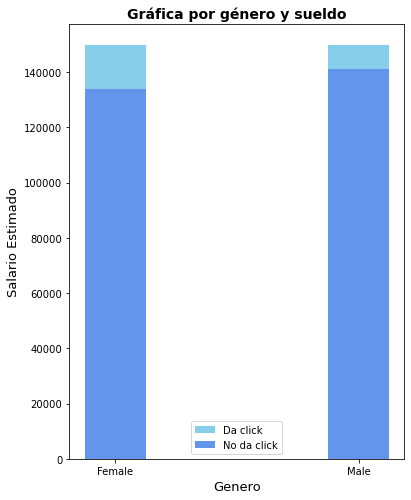

In [19]:
#Creación de una gráfica que muestra las personas que hicieron click en el anuncio segun 2 carateristicas del dataset
plt.figure(figsize=(6,8))
bar1 = plt.bar(df["Gender"][df['Purchased'] == 1], df["EstimatedSalary"][df['Purchased'] == 1], color ='Skyblue',width = 0.25)
bar2 = plt.bar(df["Gender"][df['Purchased'] == 0], df["EstimatedSalary"][df['Purchased'] == 0], color ='cornflowerblue', width = 0.25)
plt.xlabel("Genero", fontsize=13)
plt.ylabel("Salario Estimado", fontsize=13)
plt.title('Gráfica por género y sueldo',weight='bold', fontsize=14)
plt.legend(labels=['Da click', 'No da click'])
plt.show()

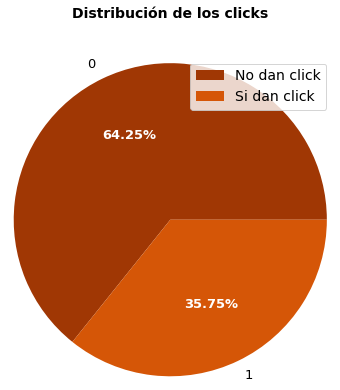

In [20]:
#Creación de una gráfica para representar el porcentaje de los 2 valores de la varible de salida
Purchased = df_new['Purchased'].value_counts()

fig, ax = plt.subplots(figsize =(8, 6))
_, _, autotexts = ax.pie(x=Purchased, labels=Purchased.index, autopct="%.2f%%", radius=1.2,
                         colors=sns.color_palette("YlOrBr_r"), explode=None, textprops=dict(fontsize=13))

ax.set_title('Distribución de los clicks', y=1.1, weight='bold', fontsize=14)
ax.legend(labels=['No dan click', 'Si dan click'], fontsize=14)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')

In [21]:
#Conjunto de datos analizado y con cambios aplicados que será utilizado para entrenar 3 modelos diferentes
df_new.to_csv('df_clear.csv',index = False)